In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head(3)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0


In [4]:
df['Current_Year'] = 2021

In [5]:
df['no_of_years'] = df['Current_Year'] - df['Year']

In [6]:
final_dataset = df.drop(['Car_Name','Year', 'Current_Year' ], axis = 1)

In [7]:
final_dataset = pd.get_dummies(final_dataset, drop_first = True)

In [8]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [9]:
X = final_dataset.iloc[:, 1:]

In [10]:
y = final_dataset.iloc[:, 0]

## Seeing which Feature is High important 

In [11]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [12]:
print(model.feature_importances_)

[0.37578092 0.04680445 0.00123639 0.07329659 0.22646668 0.01251622
 0.13427003 0.12962872]


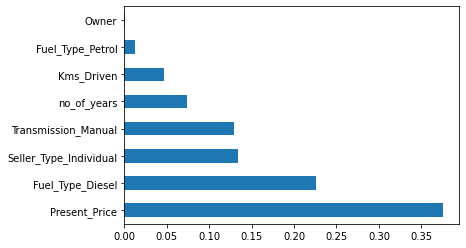

In [13]:
# To plot this
import matplotlib.pyplot as plt

feat_importances = pd.Series(model.feature_importances_, index = X.columns)
# print(feat_importances)
feat_importances.nlargest(8).plot(kind = 'barh')
plt.show()

If you observe the above graph Present price is having high importance 

* Here we can do first standardization and apply train test split or
* we can do first train test split and apply standardization (but remember in this, for X_train data you need to just apply transform because we are apply same transformation for X_test what we did for X_train)

## Train Test split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Feature Scaling (Standardization)

In [15]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [16]:
type(X_train)

numpy.ndarray

In [17]:
X_train = pd.DataFrame(X_train, columns = X.columns)

In [18]:
type(X_train)

pandas.core.frame.DataFrame

In [19]:
X_train.head(3)

,Present_Price,Kms_Driven,Owner,no_of_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,0.183601,0.012925,-0.196183,0.569153,-0.486943,0.5,-0.700488,0.377964
1,-0.029037,0.887740,-0.196183,1.260782,-0.486943,0.5,-0.700488,0.377964
2,-0.780323,0.498875,-0.196183,1.952411,-0.486943,0.5,1.427577,0.377964


# Doing simple linear regression

In [20]:
# Doing simple linear regression

from sklearn.linear_model import LinearRegression
slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

y_predict = slr_model.predict(X_test)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_predict)
print(accuracy)

0.7985567090542007


If we use Simple Linear Regression model then we get 81.116% correct result

# Doing simple linear regression with cross validation

In [21]:
# Doing simple linear regression with cross validation

from sklearn.model_selection import cross_val_score

mse = cross_val_score(slr_model, X, y, scoring = 'neg_mean_squared_error', cv = 5)

mean_mse = np.mean(mse)

print(mean_mse)

-5.027642959880447


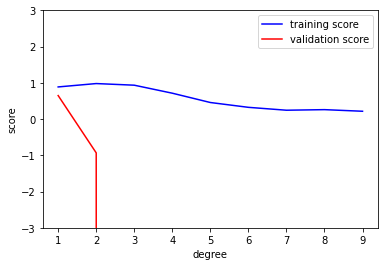

In [22]:
### Cheking degree for  Polynomial regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

def poly(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


degree = np.arange(0, 10)
train_score, val_score = validation_curve(poly(), X, y,
                                          'polynomialfeatures__degree', degree, cv=3)

# print(val_score)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(-3, 3)
plt.xlabel('degree')
plt.ylabel('score');

As you can see in the above graph at 1 and 2 training score and validation score graph are near

# Doing Polynomial regression

In [23]:
# Doing Polynomial regression by considering degree as 2

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def poly(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

plr_model = poly(2)
plr_model.fit(X_train, y_train)

y_predict = plr_model.predict(X_test)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_predict)
print(accuracy)

-5.277575600989972e+21


# Doing Ridge regression

In [24]:
# Doing Ridge regression


from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.001)   # I checked alpha value by trail and error method

ridge_model.fit(X_train, y_train)

y_predict = ridge_model.predict(X_test)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_predict)
print(accuracy)

0.7985573619198232


If we use Ridge Regression model with alpha as 0.001 then we get 81.16% correct result

# Doing Lasso regression

In [25]:
# Doing Lasso regression


from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.0001)   # I checked alpha value by trail and error method

lasso_model.fit(X_train, y_train)

y_predict = lasso_model.predict(X_test)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_predict)
print(accuracy)

0.7985826664664168


If we use Lasso Regression model with alpha as 0.0001 then we get 81.15% correct result

# Doing Random Forest Regressor

In [26]:
from sklearn.ensemble import RandomForestRegressor
reg_model = RandomForestRegressor()
reg_model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
y_pred = reg_model.predict(X_test)

from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.9569588642243446


# Doing Random Forest Regressor with hyper parameter tuning

In [28]:
### Hyperparameters
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [29]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [30]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [31]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = reg_model, param_distributions = random_grid, scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [32]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [34]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [35]:
rf_random.best_score_

-4.608858787261211

In [36]:
best_rf_model = RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000, min_samples_split = 2, min_samples_leaf = 1)

In [37]:
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [38]:
y_predict = best_rf_model.predict(X_test)

from sklearn.metrics import r2_score
accuracy = r2_score(y_test, y_predict)
print(accuracy)

0.9196069452745075


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

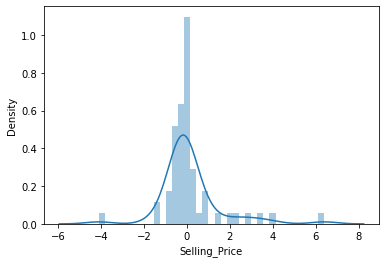

In [39]:
# another way to check accuracy score
import seaborn as sns
sns.distplot(y_test - y_predict)

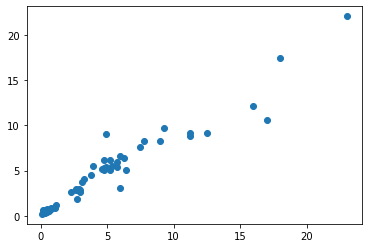

In [40]:
plt.scatter(y_test,y_predict)

In [41]:
from sklearn import metrics


print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.7422419672131138
MSE: 1.9189489960983819
RMSE: 1.3852613457750065


# **Conclusion**

When we compare the scores of all models, for Random forest Regressor we got high accuracy score